<a href="https://colab.research.google.com/github/sreekar-pasumarthi/Deep-Learning-Projects/blob/master/glass_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/sreekar-pasumarthi/Deep-Learning-Projects/master/glass.csv')
print(f'The train set contain {df_train.shape[0]} examples')
print(f'The train set contain {df_train.shape[1]} features')
df_train.head()#to select first n rows

The train set contain 214 examples
The train set contain 10 features


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [0]:
X_train = df_train.drop('Type', axis = 1)#drops the column type from the dataframe
y_train = df_train['Type']#selects only the last column from the dataframe

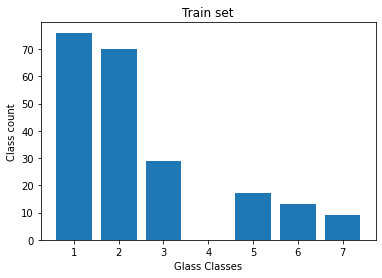

In [4]:
glass_classes = y_train.unique()#no. of classes 
values = y_train.value_counts()#occurrence of each class

plt.bar(glass_classes, values)
plt.title('Train set')
plt.xlabel('Glass Classes')
plt.ylabel('Class count')
plt.show()

In [0]:
X_train.describe()#to describe the data

In [8]:
X_train = df_train.values#to convert it to array and then normalise
X_train = normalize(X_train)#rescaling the data between 0 and 1
print(X_train[0])

[2.06227172e-02 1.84938864e-01 6.08779693e-02 1.49144245e-02
 9.73233994e-01 8.13514066e-04 1.18637468e-01 0.00000000e+00
 0.00000000e+00 1.35585678e-02]


In [9]:
y_train = to_categorical(y_train)#to convert y_train into to 'one hot vector'
y_train.shape

(214, 8)

In [0]:
#Split the dataset into three sets.
#Since data is significantly small we will split to:
#train - 80% valid - 10% test - 10%
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)#Split arrays or matrices into random train and test subsets
#test_size represents the proportion of the dataset to include in the test split.->20% to test split from training data
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5)#->50% of test split to validation data

In [0]:
model = tf.keras.models.Sequential([
 tf.keras.layers.Dense(256, input_shape=(10,), activation='relu'),
 tf.keras.layers.Dense(8, activation='softmax')
])

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 2056      
Total params: 4,872
Trainable params: 4,872
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(X_train, y_train,epochs=1000,validation_data=(X_val, y_val),verbose=2)

Epoch 1/1000
6/6 - 0s - loss: 0.5480 - acc: 0.8830 - val_loss: 0.7187 - val_acc: 0.8095
Epoch 2/1000
6/6 - 0s - loss: 0.5436 - acc: 0.8947 - val_loss: 0.7062 - val_acc: 0.8095
Epoch 3/1000
6/6 - 0s - loss: 0.5444 - acc: 0.9006 - val_loss: 0.6970 - val_acc: 0.8095
Epoch 4/1000
6/6 - 0s - loss: 0.5448 - acc: 0.9006 - val_loss: 0.7060 - val_acc: 0.8095
Epoch 5/1000
6/6 - 0s - loss: 0.5403 - acc: 0.9064 - val_loss: 0.7124 - val_acc: 0.8095
Epoch 6/1000
6/6 - 0s - loss: 0.5390 - acc: 0.9006 - val_loss: 0.7150 - val_acc: 0.8095
Epoch 7/1000
6/6 - 0s - loss: 0.5400 - acc: 0.9006 - val_loss: 0.7077 - val_acc: 0.8095
Epoch 8/1000
6/6 - 0s - loss: 0.5367 - acc: 0.9064 - val_loss: 0.7062 - val_acc: 0.8095
Epoch 9/1000
6/6 - 0s - loss: 0.5364 - acc: 0.9064 - val_loss: 0.7019 - val_acc: 0.8095
Epoch 10/1000
6/6 - 0s - loss: 0.5359 - acc: 0.9064 - val_loss: 0.7183 - val_acc: 0.8095
Epoch 11/1000
6/6 - 0s - loss: 0.5337 - acc: 0.8947 - val_loss: 0.7197 - val_acc: 0.8095
Epoch 12/1000
6/6 - 0s - loss:

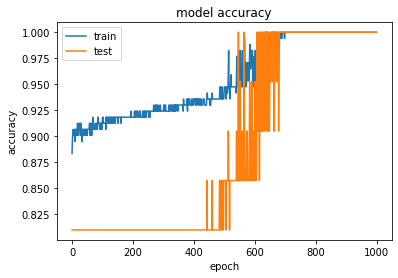

In [25]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])#val_acc :accuracy on valid data
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

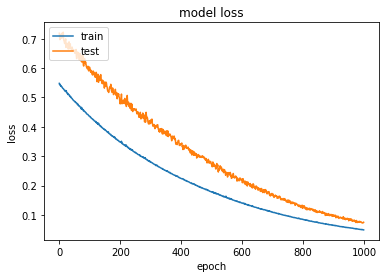

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 1ms/step - loss: 0.0498 - acc: 1.0000
Accuracy: 100.00


In [28]:
y_pred = model.predict(X_test)
y_pred_cl = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)

confusion_matrix(y_true, y_pred_cl)

array([[ 8,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  0],
       [ 0,  0,  2,  0,  0],
       [ 0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1]])